In [10]:
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

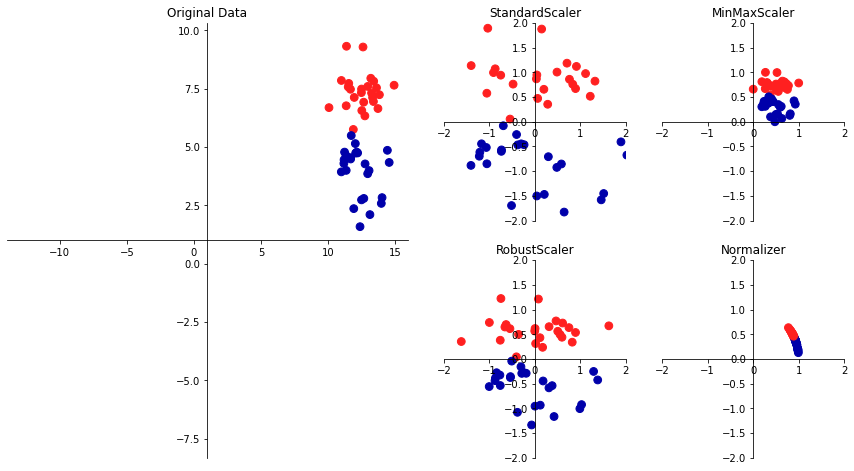

In [2]:
mglearn.plots.plot_scaling()

### Applying Data Transformations of Training and Testing Set

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler()

####  Applying transformation on training set

In [7]:
# Transform the Data using the 'scaler' object
X_train_scaled = scaler.transform(X_train)

# Printing the dataset values before and after the scaling
print("Transformed Shape: {}".format(X_train_scaled.shape))
print("Per-Feature Minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("Per-Feature Maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("Per-Feature Minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("Per-Feature Maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

Transformed Shape: (426, 30)
Per-Feature Minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Per-Feature Maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
Per-Feature Minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Per-Feature Maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### Applying transformation on Testing Set

In [8]:
# Transforming the testing set
X_test_scaled = scaler.transform(X_test)

# Printing the test data properties after scaling
print("Per-Feature Minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("Per-Feature Maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

Per-Feature Minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
Per-Feature Maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### Scaling Training and Test Data the Same Way

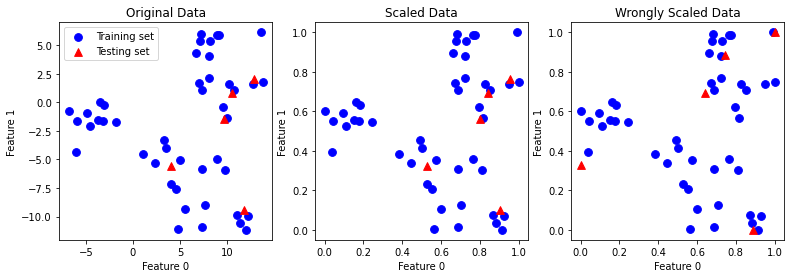

In [19]:
from sklearn.datasets import make_blobs

# make synthetic data
X, _ = make_blobs(n_samples = 50, centers=5, random_state=4, cluster_std=2)

# Splitting the data
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# Plotting the training and testing sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', color='red', label="Testing set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scaling the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualise the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color='blue', label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', color='red', label="Testing set", s=60)
axes[1].set_title("Scaled Data")

# Rescaling the testing Data so that test sit min = 0 and max = 1
# This is just for reference. DO NOT DO THIS !!!!!

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualise the wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color='blue', label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', color='red', label="Testing set", s=60)
axes[2].set_title("Wrongly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")